In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
data=pd.read_csv('oec.csv', sep=",")

In [3]:
#размер датасета
data.shape

(3584, 25)

In [4]:
data.head()

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,...,LastUpdated,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr,ListsPlanetIsOn
0,HD 143761 b,0,1.0450,NaN,39.845800,0.2196,0.037,270.6,NaN,NaN,...,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627.0,NaN,Confirmed planets
1,HD 143761 c,0,0.0790,NaN,102.540000,0.4123,0.050,190.0,NaN,NaN,...,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627.0,NaN,Confirmed planets
2,KOI-1843.03,0,0.0014,0.054,0.176891,0.0048,NaN,NaN,NaN,NaN,...,13/07/15,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial
3,KOI-1843.01,0,NaN,0.114,4.194525,0.0390,NaN,NaN,NaN,NaN,...,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial
4,KOI-1843.02,0,NaN,0.071,6.356006,0.0520,NaN,NaN,NaN,NaN,...,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial


In [5]:
# Колонки с пропусками
hcols_with_na = [c for c in data.columns if data[c].isnull().sum() > 0]
hcols_with_na

['PlanetaryMassJpt',
 'RadiusJpt',
 'PeriodDays',
 'SemiMajorAxisAU',
 'Eccentricity',
 'PeriastronDeg',
 'LongitudeDeg',
 'AscendingNodeDeg',
 'InclinationDeg',
 'SurfaceTempK',
 'AgeGyr',
 'DiscoveryMethod',
 'DiscoveryYear',
 'LastUpdated',
 'RightAscension',
 'Declination',
 'DistFromSunParsec',
 'HostStarMassSlrMass',
 'HostStarRadiusSlrRad',
 'HostStarMetallicity',
 'HostStarTempK',
 'HostStarAgeGyr']

In [6]:
# Количество пропусков
[(c, data[c].isnull().sum()) for c in hcols_with_na]

[('PlanetaryMassJpt', 2271),
 ('RadiusJpt', 810),
 ('PeriodDays', 99),
 ('SemiMajorAxisAU', 2178),
 ('Eccentricity', 2476),
 ('PeriastronDeg', 3256),
 ('LongitudeDeg', 3541),
 ('AscendingNodeDeg', 3538),
 ('InclinationDeg', 2919),
 ('SurfaceTempK', 2843),
 ('AgeGyr', 3582),
 ('DiscoveryMethod', 63),
 ('DiscoveryYear', 10),
 ('LastUpdated', 8),
 ('RightAscension', 10),
 ('Declination', 10),
 ('DistFromSunParsec', 1451),
 ('HostStarMassSlrMass', 168),
 ('HostStarRadiusSlrRad', 321),
 ('HostStarMetallicity', 1075),
 ('HostStarTempK', 129),
 ('HostStarAgeGyr', 3067)]

In [8]:
#удаление колонок, где пропуски преобладают
data=data.drop(['Eccentricity','PlanetaryMassJpt','AgeGyr','SemiMajorAxisAU','LongitudeDeg','LongitudeDeg', 'PeriastronDeg','SurfaceTempK', 'AscendingNodeDeg', 'HostStarAgeGyr','InclinationDeg'], axis='columns')

Устранение пропусков в данных

In [11]:
from sklearn.impute import SimpleImputer

In [12]:
#Удаление строк, содержащих пустые значения
#Удаление строк, содержащих пустые значения
data_new2=data.dropna(axis=0, how='any')
(data.shape, data_new2.shape)

((3584, 15), (475, 15))

Категориальные признаки

In [13]:
#заполнение наиболее частыми значениями
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data[['LastUpdated','RightAscension','Declination']] = imp.fit_transform(data[['LastUpdated', 'RightAscension','Declination']])

In [14]:
#Введение отдельного значения категории для пропущенных значений
imp2 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='no data')
data[['DiscoveryMethod']] = imp2.fit_transform(data[['DiscoveryMethod']])

In [15]:
data['DiscoveryMethod'].unique()

array(['RV', 'transit', 'microlensing', 'no data', 'imaging', 'timing'],
      dtype=object)

Числовые признаки

In [16]:
#Заполнение средним значением
data.loc[:, 'RadiusJpt']=data.loc[:, 'RadiusJpt'].fillna(data['RadiusJpt'].mean())

In [17]:
data.loc[:, 'DiscoveryYear']=data.loc[:, 'DiscoveryYear'].fillna(data['DiscoveryYear'].mean())

In [18]:
data.loc[:, 'HostStarMetallicity']=data.loc[:, 'HostStarMetallicity'].fillna(data['HostStarMetallicity'].mean())

In [19]:
data.loc[:, 'HostStarRadiusSlrRad']=data.loc[:, 'HostStarRadiusSlrRad'].fillna(data['HostStarRadiusSlrRad'].mean())

Кодирование категориальных признаков

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(data.PlanetIdentifier )
data['PlanetIdentifier']=le.transform(data.PlanetIdentifier )

In [21]:
#Count encoding
from category_encoders.count import CountEncoder as ce_CountEncoder

In [22]:
ce_CountEncoder1 = ce_CountEncoder()
data['DiscoveryMethod'] = ce_CountEncoder1.fit_transform(data['DiscoveryMethod'])

In [23]:
data['DiscoveryMethod'].unique()

array([ 692, 2712,   40,   63,   52,   25], dtype=int64)

In [24]:
le=LabelEncoder()
le.fit(data.LastUpdated )
data['LastUpdated']=le.transform(data.LastUpdated )

In [25]:
le=LabelEncoder()
le.fit(data.RightAscension)
data['RightAscension']=le.transform(data.RightAscension)

In [26]:
le=LabelEncoder()
le.fit(data.Declination)
data['Declination']=le.transform(data.Declination)

In [27]:
le=LabelEncoder()
le.fit(data.ListsPlanetIsOn)
data['ListsPlanetIsOn']=le.transform(data.ListsPlanetIsOn)

In [28]:
data.dtypes

PlanetIdentifier          int32
TypeFlag                  int64
RadiusJpt               float64
PeriodDays              float64
DiscoveryMethod           int64
DiscoveryYear           float64
LastUpdated               int32
RightAscension            int32
Declination               int32
DistFromSunParsec       float64
HostStarMassSlrMass     float64
HostStarRadiusSlrRad    float64
HostStarMetallicity     float64
HostStarTempK           float64
ListsPlanetIsOn           int32
dtype: object

In [29]:
from sklearn.impute import KNNImputer
knnimputer = KNNImputer(
    n_neighbors=5, 
    weights='distance', 
    metric='nan_euclidean', 
    add_indicator=False, 
)
knnimpute_hdata_imputed_temp = knnimputer.fit_transform(data)
data = pd.DataFrame(knnimpute_hdata_imputed_temp, columns=data.columns)
data.head()

,PlanetIdentifier,TypeFlag,RadiusJpt,PeriodDays,DiscoveryMethod,DiscoveryYear,LastUpdated,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,ListsPlanetIsOn
0,468.0,0.0,0.37119,39.845800,692.0,2016.000000,454.0,608.0,274.0,17.236000,0.889,1.362,-0.31,5627.0,0.0
1,469.0,0.0,0.37119,102.540000,692.0,2016.000000,454.0,608.0,274.0,17.236000,0.889,1.362,-0.31,5627.0,0.0
2,948.0,0.0,0.05400,0.176891,2712.0,2012.000000,239.0,972.0,549.0,176.802885,0.460,0.450,0.00,3584.0,6.0
3,946.0,0.0,0.11400,4.194525,2712.0,2013.300504,440.0,972.0,549.0,175.005239,0.460,0.450,0.00,3584.0,6.0
4,947.0,0.0,0.07100,6.356006,2712.0,2013.300504,440.0,972.0,549.0,175.032000,0.460,0.450,0.00,3584.0,6.0


In [30]:
data.isnull().sum()

PlanetIdentifier        0
TypeFlag                0
RadiusJpt               0
PeriodDays              0
DiscoveryMethod         0
DiscoveryYear           0
LastUpdated             0
RightAscension          0
Declination             0
DistFromSunParsec       0
HostStarMassSlrMass     0
HostStarRadiusSlrRad    0
HostStarMetallicity     0
HostStarTempK           0
ListsPlanetIsOn         0
dtype: int64

Лабораторная работа №3

Масштабирование признаков

In [31]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler 

In [32]:
#масштабирование на основе Z-оценки
sc1 = StandardScaler()
sc1_data = sc1.fit_transform(data[['HostStarTempK', 'DistFromSunParsec']])

<AxesSubplot:ylabel='Density'>

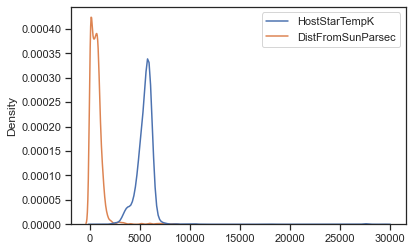

In [33]:
sns.kdeplot(data=data[['HostStarTempK', 'DistFromSunParsec']])

<AxesSubplot:ylabel='Density'>

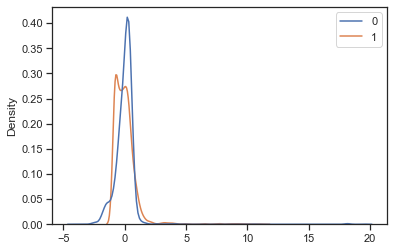

In [34]:
sns.kdeplot(data=sc1_data)

In [35]:
#MinMax-масштабирование
sc2 = MinMaxScaler()
sc2_data = sc2.fit_transform(data[['HostStarTempK', 'DistFromSunParsec']])

<AxesSubplot:ylabel='Density'>

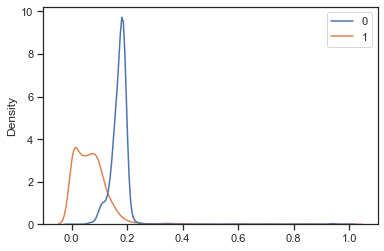

In [36]:
sns.kdeplot(data=sc2_data)

In [37]:
#масштабирование по медиане
sc3 = RobustScaler()
sc3_data = sc3.fit_transform(data[['HostStarTempK', 'DistFromSunParsec']])

<AxesSubplot:ylabel='Density'>

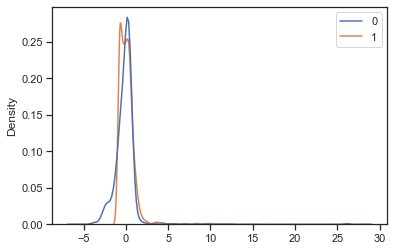

In [38]:
sns.kdeplot(data=sc3_data)

Обработка выбросов

In [44]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

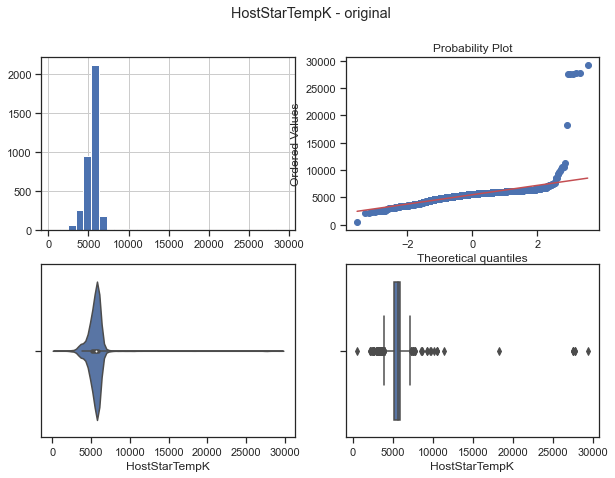

In [45]:
diagnostic_plots(data, 'HostStarTempK', 'HostStarTempK - original')

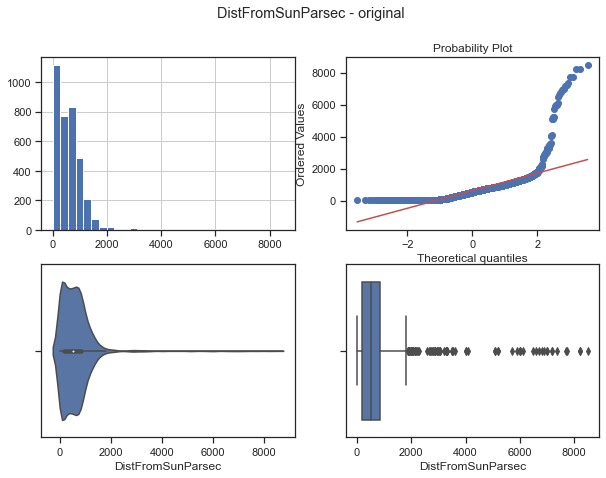

In [46]:
diagnostic_plots(data, 'DistFromSunParsec', 'DistFromSunParsec - original')

In [47]:
# Тип вычисления верхней и нижней границы выбросов
from enum import Enum
class OutlierBoundaryType(Enum):
    SIGMA = 1
    QUANTILE = 2
    IRQ = 3

In [48]:
# Функция вычисления верхней и нижней границы выбросов
def get_outlier_boundaries(df, col, outlier_boundary_type: OutlierBoundaryType):
    if outlier_boundary_type == OutlierBoundaryType.SIGMA:
        K1 = 3
        lower_boundary = df[col].mean() - (K1 * df[col].std())
        upper_boundary = df[col].mean() + (K1 * df[col].std())

    elif outlier_boundary_type == OutlierBoundaryType.QUANTILE:
        lower_boundary = df[col].quantile(0.05)
        upper_boundary = df[col].quantile(0.95)

    elif outlier_boundary_type == OutlierBoundaryType.IRQ:
        K2 = 1.5
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        lower_boundary = df[col].quantile(0.25) - (K2 * IQR)
        upper_boundary = df[col].quantile(0.75) + (K2 * IQR)

    else:
        raise NameError('Unknown Outlier Boundary Type')
        
    return lower_boundary, upper_boundary 

In [49]:
data.shape

(3584, 15)

In [50]:
x_col_list = ['HostStarTempK', 'DistFromSunParsec']

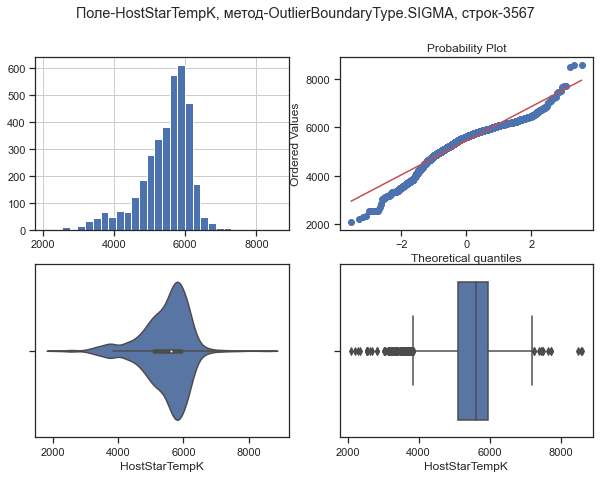

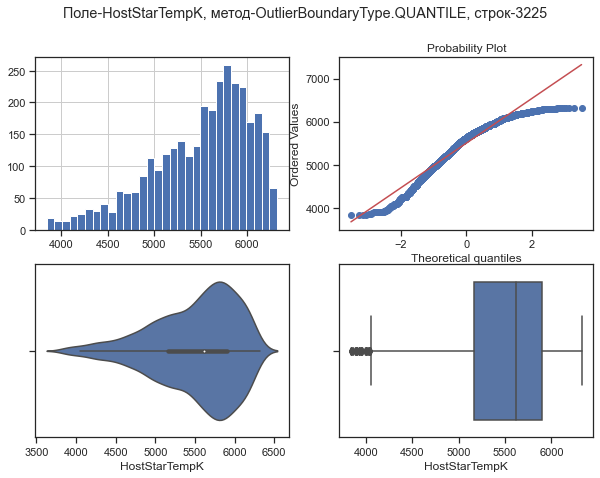

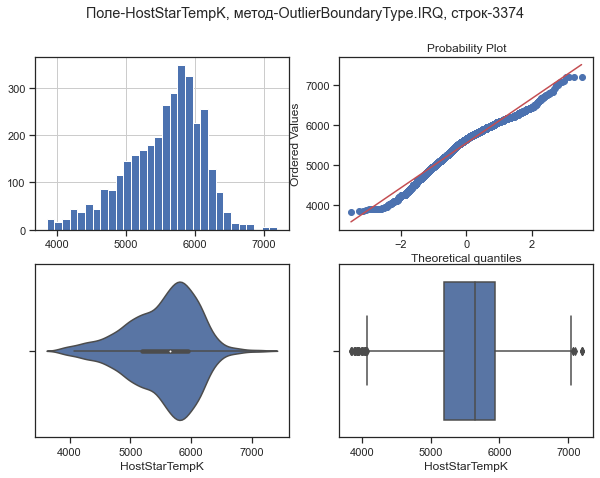

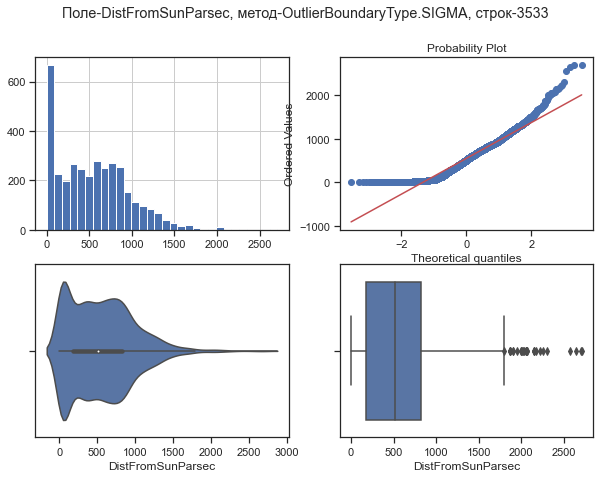

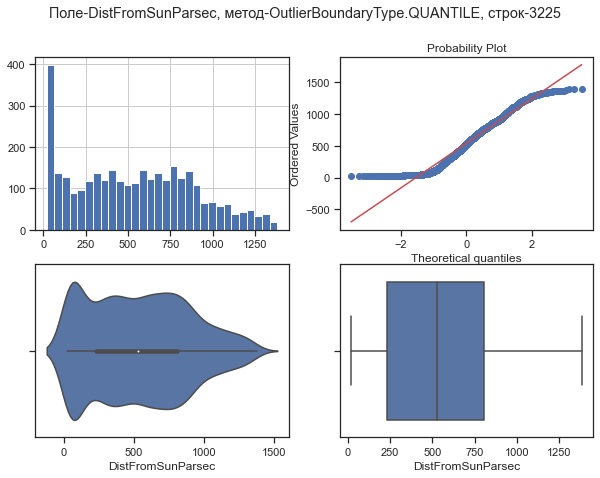

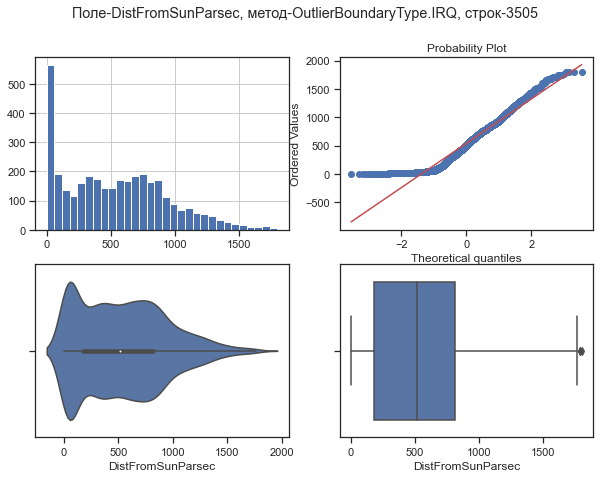

In [51]:
for col in x_col_list:    
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
        # Флаги для удаления выбросов
        outliers_temp = np.where(data[col] > upper_boundary, True, 
                                 np.where(data[col] < lower_boundary, True, False))
        # Удаление данных на основе флага
        data_trimmed = data.loc[~(outliers_temp), ]  
        title = 'Поле-{}, метод-{}, строк-{}'.format(col, obt, data_trimmed.shape[0])
        diagnostic_plots(data_trimmed, col, title)

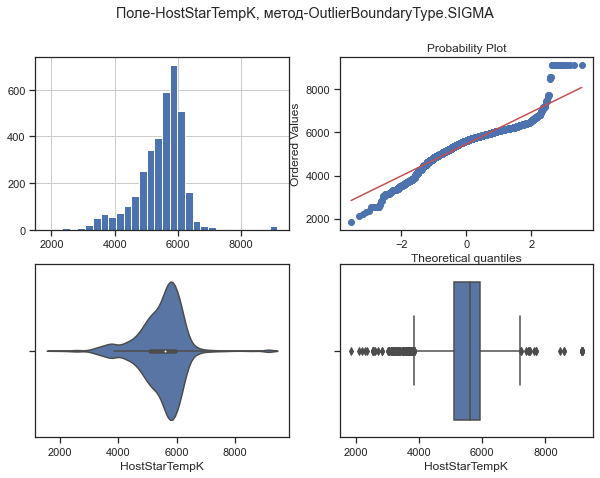

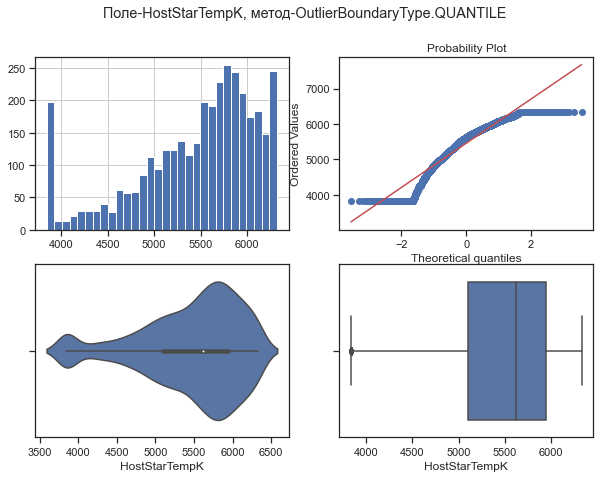

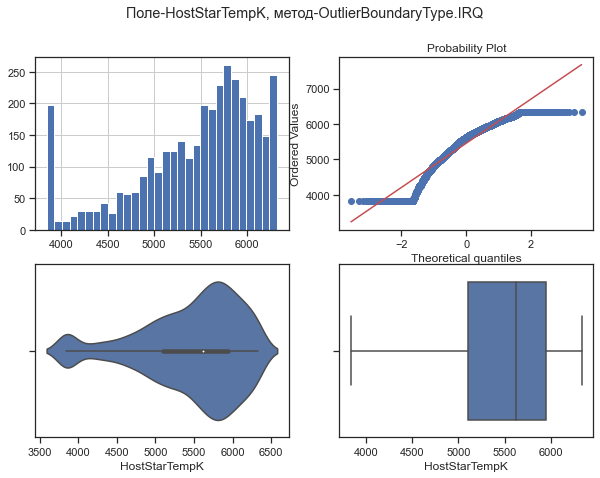

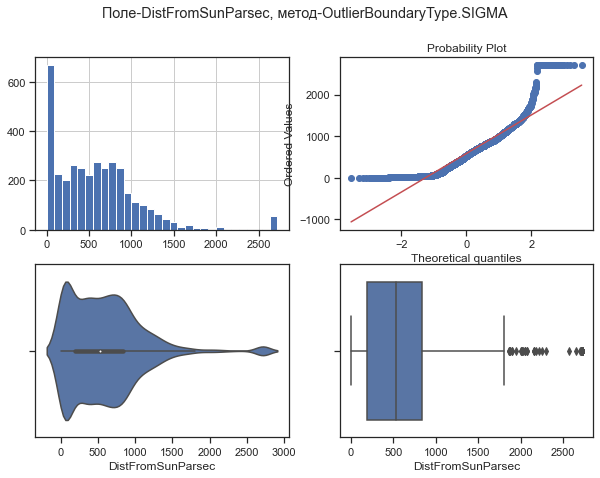

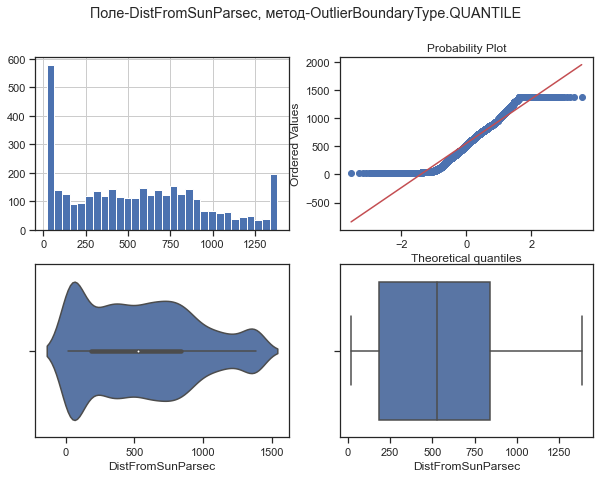

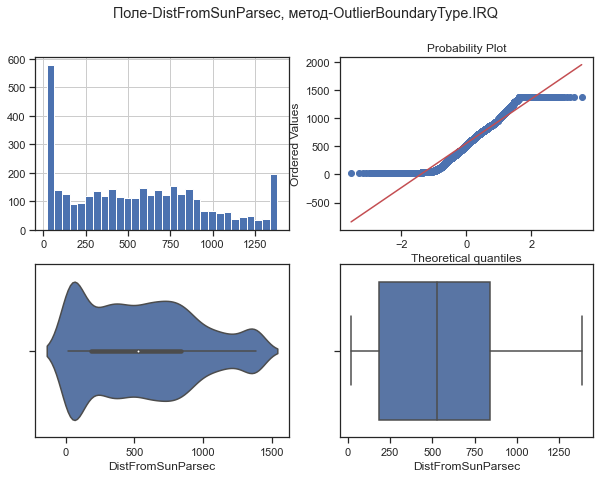

In [52]:
for col in x_col_list:    
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
        # Изменение данных
        data[col] = np.where(data[col] > upper_boundary, upper_boundary, 
                                 np.where(data[col] < lower_boundary, lower_boundary, data[col]))
        title = 'Поле-{}, метод-{}'.format(col, obt)
        diagnostic_plots(data, col, title)

Отбор признаков

In [53]:
#filter methods
def get_duplicates(X):
    """
    Поиск дубликатов в колонках
    X - DataFrame
    """
    
    pairs = {}
    dups = []

    # Перебор всех колонок (внешний)
    for i in range(X.shape[1]):

        # текущая колонка
        feat_outer = X.columns[i]

        # если текущая колонка не является дублем
        if feat_outer not in dups:

            # создаем запись в словаре, колонка является ключом
            pairs[feat_outer] = []

            # Перебор оставшихся колонок (внутренний)
            for feat_inner in X.columns[i + 1:]:

                # Если колонки идентичны
                if X[feat_outer].equals(X[feat_inner]):

                    # добавление в словарь и список дубликатов
                    pairs[feat_outer].append(feat_inner)
                    dups.append(feat_inner)

    return pairs

In [54]:
get_duplicates(data)

{'PlanetIdentifier': [],
 'TypeFlag': [],
 'RadiusJpt': [],
 'PeriodDays': [],
 'DiscoveryMethod': [],
 'DiscoveryYear': [],
 'LastUpdated': [],
 'RightAscension': [],
 'Declination': [],
 'DistFromSunParsec': [],
 'HostStarMassSlrMass': [],
 'HostStarRadiusSlrRad': [],
 'HostStarMetallicity': [],
 'HostStarTempK': [],
 'ListsPlanetIsOn': []}

In [56]:
#wrapper methods
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [63]:
efs1 = EFS(knn, 
           min_features=1,
           max_features=2,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs1 = efs1.fit(data[['HostStarMassSlrMass','HostStarRadiusSlrRad', 'DistFromSunParsec']], data[['HostStarTempK']])

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

c:\users\надя\appdata\local\programs\python\python37\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\надя\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\надя\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\надя\appdata\local\programs\python\python37\lib\site-packages\sklearn\neighbors\_classification.py", line 179, in fit
    return self._fit(X, y)
  File "c:\users\надя\appdata\local\programs\python\python37\lib\si

c:\users\надя\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\надя\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\надя\appdata\local\programs\python\python37\lib\site-packages\sklearn\neighbors\_classification.py", line 179, in fit
    return self._fit(X, y)
  File "c:\users\надя\appdata\local\programs\python\python37\lib\site-packages\sklearn\neighbors\_base.py", line 381, in _fit
    check_classification_targets(y)
  File "c:\users\надя\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" %

UnboundLocalError: local variable 'best_subset' referenced before assignment

In [73]:
efs2 = EFS(knn, 
           min_features=1,
           max_features=2,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs2 = efs2.fit(data[['HostStarMassSlrMass','HostStarRadiusSlrRad', 'DistFromSunParsec']], data[['TypeFlag']])

print('Best accuracy score: %.2f' % efs2.best_score_)
print('Best subset (indices):', efs2.best_idx_)
print('Best subset (corresponding names):', efs2.best_feature_names_)

c:\users\надя\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
c:\users\надя\appdata\local\programs\python\python37\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\надя\appdata\local\programs\python\python37\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\надя\appdata\local\programs\python\python37\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was pass

c:\users\надя\appdata\local\programs\python\python37\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\надя\appdata\local\programs\python\python37\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\надя\appdata\local\programs\python\python37\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
Features: 6/6

Best accuracy score: 0.94
Best subset (indices): (2,)
Best subset (corresponding names): ('DistFromSunParsec',)


In [65]:
#embedded methods
from sklearn.linear_model import LogisticRegression

In [69]:
# Используем L1-регуляризацию
e_lr1 = LogisticRegression(C=1000, solver='liblinear', penalty='l1', max_iter=500, random_state=1)
e_lr1.fit(data[['HostStarMassSlrMass','HostStarRadiusSlrRad', 'DistFromSunParsec']], data[['TypeFlag']])
# Коэффициенты регрессии
e_lr1.coef_

c:\users\надя\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([[-6.90454280e-02, -7.89441404e-03,  2.89928264e-03],
       [-1.08644978e+00,  3.13511851e-02,  1.53656587e-04],
       [ 1.92457113e-01,  2.94652166e-03, -3.94425882e-03],
       [ 1.03228784e+00, -8.67972471e-02, -5.87089970e-02]])

In [72]:
from sklearn.feature_selection import SelectFromModel
# Все 4 признака являются "хорошими"
sel_e_lr1 = SelectFromModel(e_lr1)
sel_e_lr1.fit(data[['HostStarMassSlrMass','HostStarRadiusSlrRad', 'DistFromSunParsec']], data[['TypeFlag']])
sel_e_lr1.get_support()

c:\users\надя\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([ True,  True,  True])